In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# print(mpl.style.available)
# import matplotlib as mpl
# mpl.style.use('seaborn-v0_8-darkgrid')

In [ ]:
df = pd.read_csv('../src/data/jamboree.csv',index_col='Serial No.')
df.info(verbose=True,memory_usage=True)

print(df.sample(5).to_string())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB
            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit 
Serial No.                                                                                        
147               315          105                  3  2.0   2.5  8.48         0              0.75
428               310          101                  3  3.5   5.0  8.65   

In [ ]:
# some info
pd.DataFrame(
    data=[
        df.isna().sum(),
        df.nunique(),
        df.dtypes,
        df.count(),
        df.mean(),
        df.std(),
        df.var(),
        df.median()
    ],
    index=['isna','nunique','dtypes','count','mean','std','var','median']
)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
isna,0,0,0,0,0,0,0,0
nunique,49,29,5,9,9,184,2,61
dtypes,int64,int64,int64,float64,float64,float64,int64,float64
count,500,500,500,500,500,500,500,500
mean,316.472,107.192,3.114,3.374,3.484,8.57644,0.56,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
var,127.580377,36.989114,1.307619,0.982088,0.856457,0.365799,0.246894,0.019921
median,317.0,107.0,3.0,3.5,3.5,8.56,1.0,0.72


In [14]:
# TODO: help to debug chaining function
# use df.pipe(debug_df)
def debug_df(df_:pd.DataFrame)->pd.DataFrame:
    print('*'*50,'DEBUG',"*"*50)
    print(f"shape of df: {df_.shape}")
    print('-'*50,'DEBUG',"-"*50)
    print(f"{df_.sample(4).to_string()}")
    print('-'*50,'DEBUG',"-"*50)
    print(f"{df_.describe()}")
    print('*'*50,'DEBUG',"*"*50)
    return df_


# TODO: Drop Duplicates and Clean Dataset
# remove duplicate records and check dtypes
def tweak_jamboree(df_:pd.DataFrame)->pd.DataFrame:
    columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
    return(
        df_[columns]
        .drop_duplicates()
        .astype({
            'GRE Score':'int64',
            'TOEFL Score':'int64',
            'University Rating':'int64', 
             'SOP':'float64', 
             'LOR ':'float64', 
             'CGPA':'float64', 
             'Research':'int64', 
             'Chance of Admit ':'float64'
        })
        # .pipe(debug_df)\
        .rename(columns={i:i.lower().strip().replace(' ','_') for i in df_.columns})

    )

In [16]:
df = tweak_jamboree(df)

In [ ]:
def univariate_plot(x,y):
    fig = plt.figure(figsize=(15,5))
    ax2 = fig.add_subplot(121)
    sns.boxplot(x,ax=ax2)
    ax = fig.add_subplot(122)
    sns.histplot(x,kde=True,ax=ax)
    ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
    ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
    ax.axvline(x.mode()[0], color='green', linestyle='--',linewidth=1.5)
    ax.legend(labels=['kde','mean','median','mode'])
    ax.set_title(str(y))
    ax2.set_title(str(y))
    plt.show()

In [ ]:
for i in list(df.select_dtypes(include=["number"]).columns):
    univariate_plot(df[i],i)

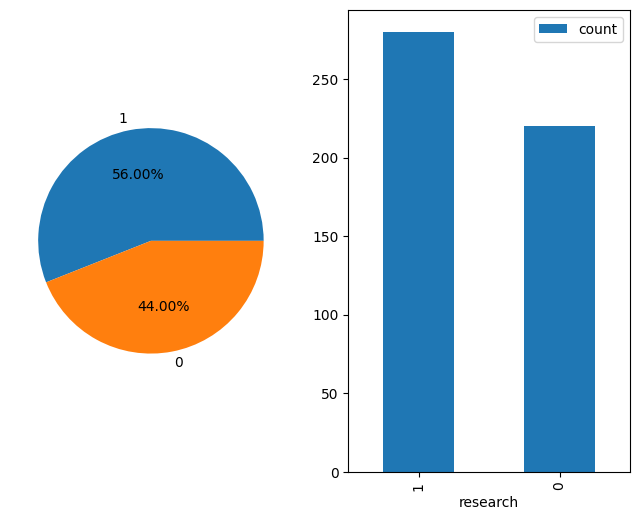

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,6))
ax1.pie( df['research'].value_counts(dropna=False), autopct='%1.2f%%',labels=df.research.value_counts().index )
df['research'].value_counts().plot(kind='bar',ax=ax2,label='count')
plt.legend()
plt.show()

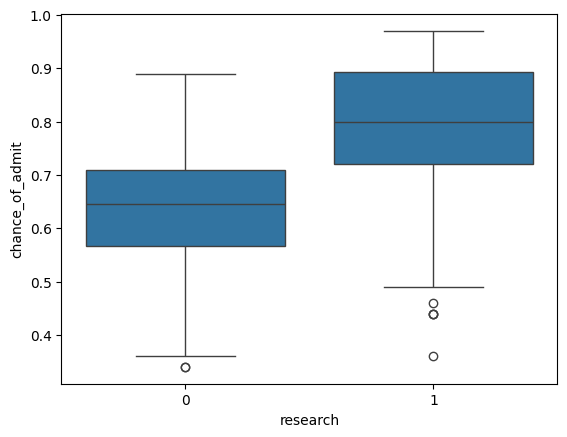

In [18]:
sns.boxplot(data=df,x='research',y='chance_of_admit')
plt.show()


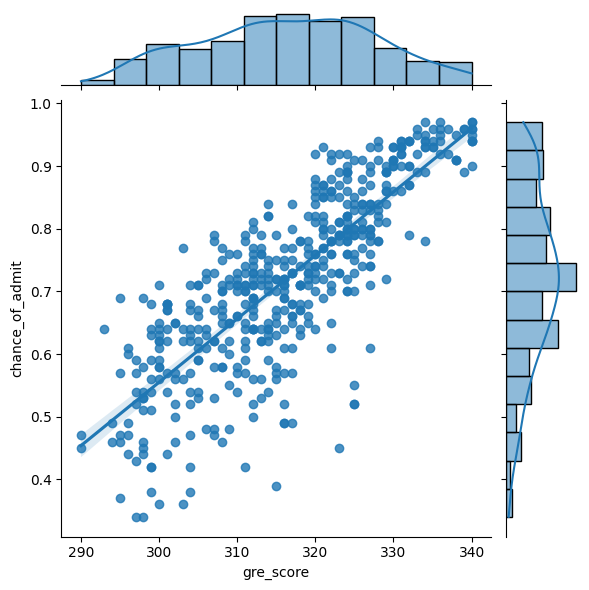

In [19]:
sns.jointplot( data=df, kind='reg', x='gre_score',y='chance_of_admit',)
plt.show()


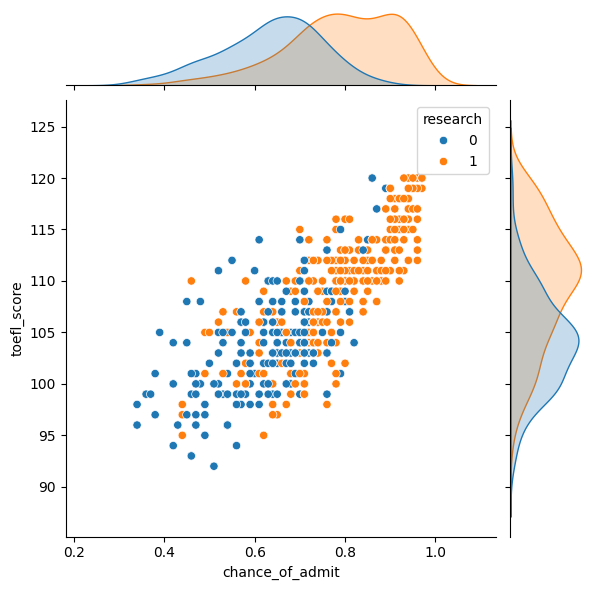

In [20]:
sns.jointplot(data=df,x='chance_of_admit',y='toefl_score',kind="scatter", hue="research")# kind="hex"
plt.show()

In [21]:
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

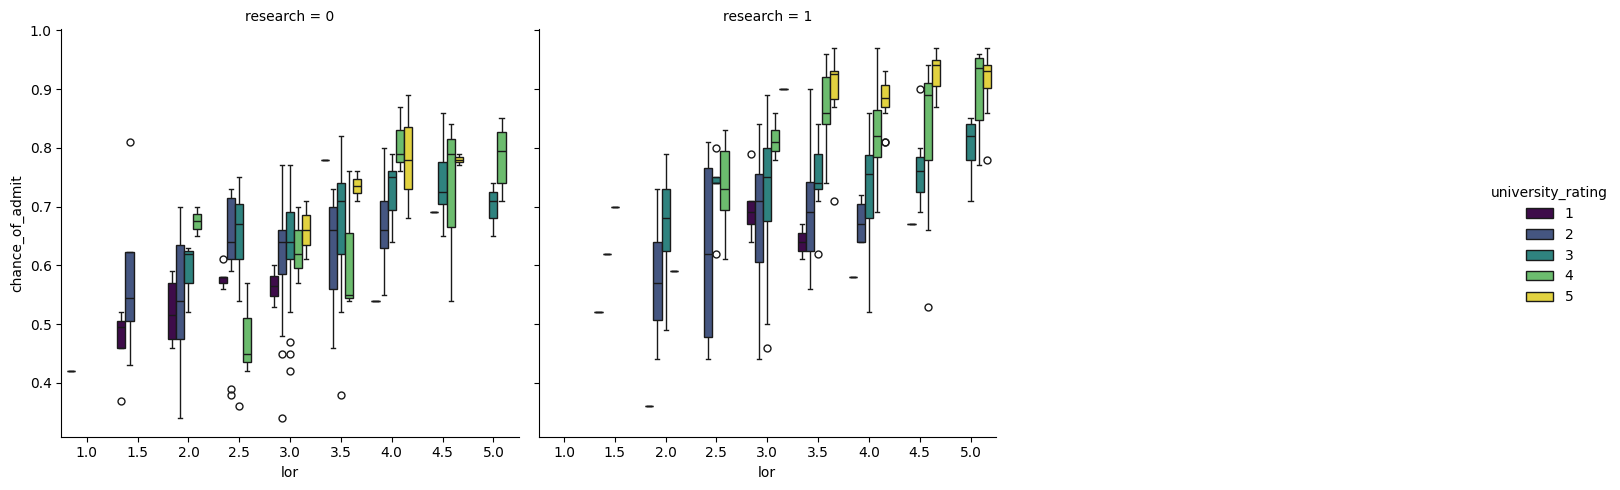

In [25]:
sns.catplot(data=df,y='chance_of_admit',hue='university_rating',x='lor',kind="box",col='research',col_wrap=3,palette='viridis')
plt.show()

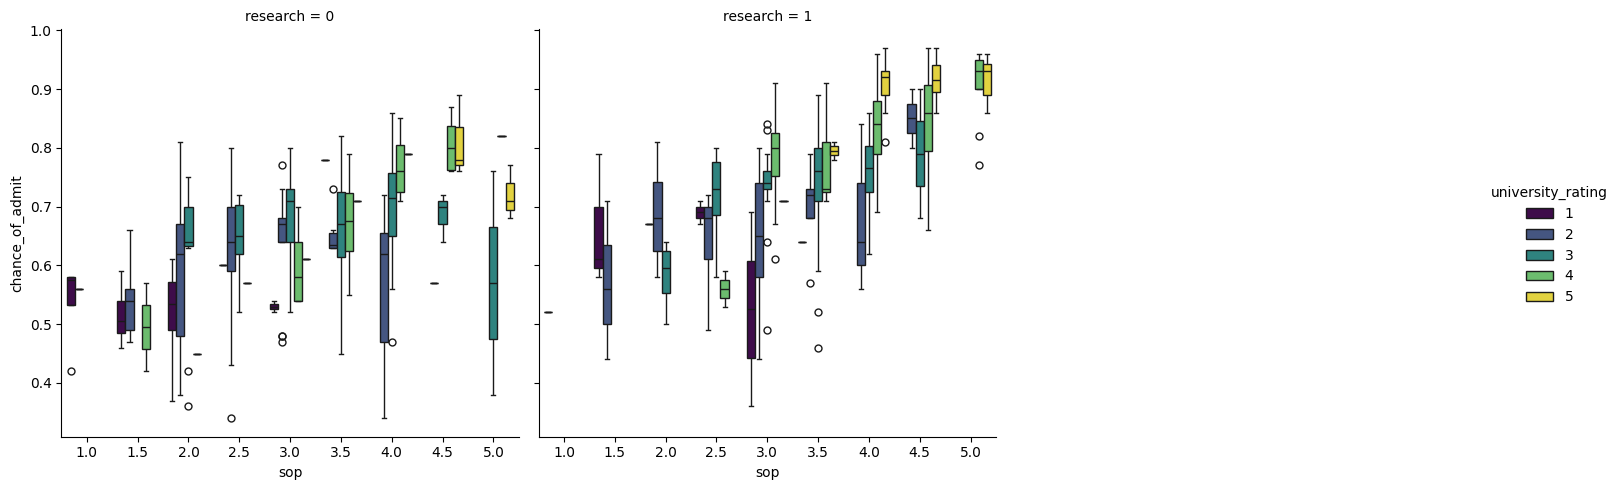

In [26]:
sns.catplot(data=df,y='chance_of_admit', hue='university_rating', x='sop',kind="box",col='research',col_wrap=3,palette='viridis')
plt.show()

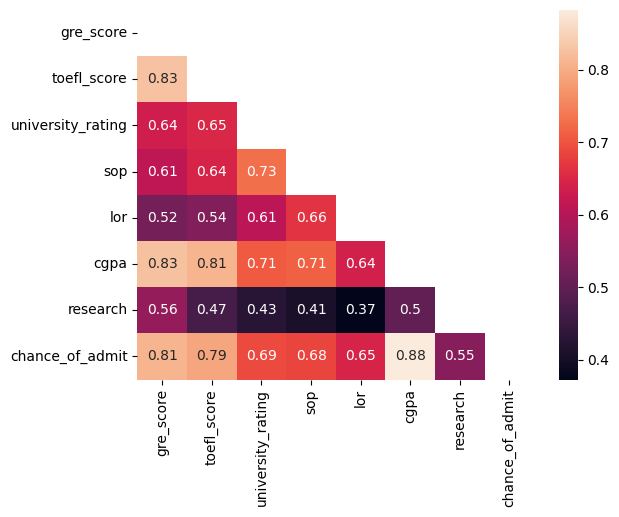

In [27]:
corr = df.corr(); _ = np.triu(corr)
sns.heatmap(data=corr,annot=True,mask=_)
plt.show()

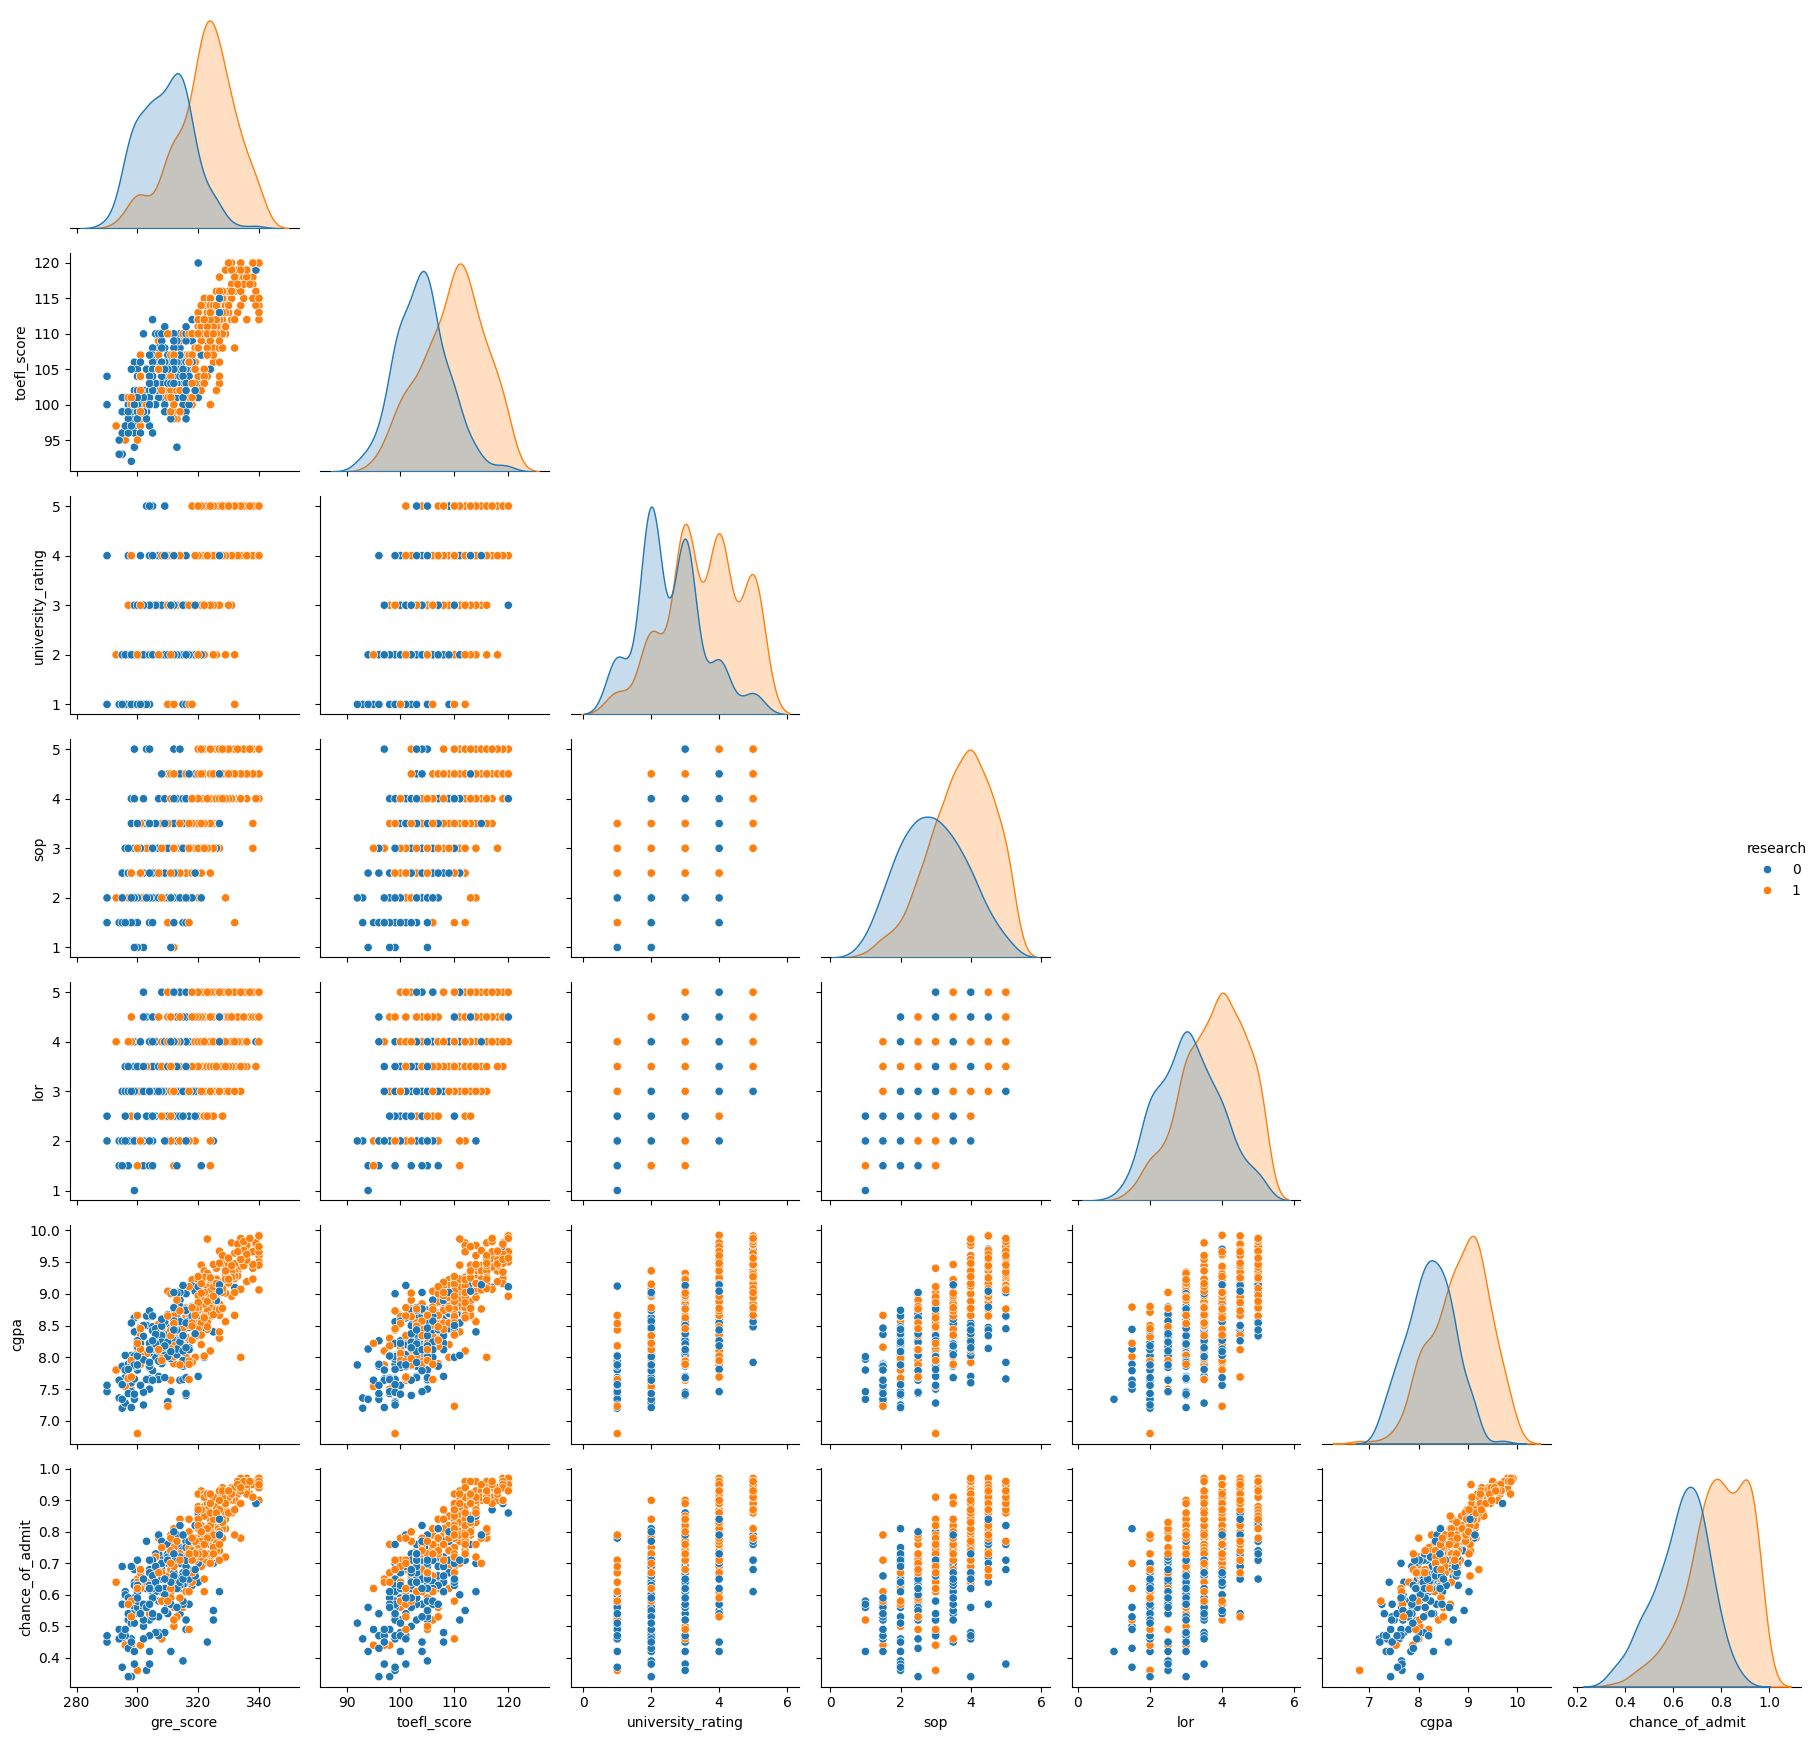

In [33]:
sns.pairplot(data=df,corner=True,hue='research')
plt.tight_layout()
plt.show()
